# Proyecto2025_Riesgo_Operativo_Aerogeneradores_RioGrande_TDF

**Materia:** Aprendizaje Automático  
**Autor:** Sabrina Villegas  
**Fecha:** Junio 2025  
**Notebook:** 04 - Entrenamiento y Evaluación de Modelos de Clasificación

---

## Objetivo

El objetivo de este notebook es:

- Separar los datos en conjuntos de entrenamiento y prueba.
- Balancear las clases en el conjunto de entrenamiento utilizando **SMOTE**.
- Normalizar las variables cuando sea necesario para ciertos modelos.
- Entrenar y evaluar varios algoritmos de clasificación multiclase:
  - **Árbol de Decisión**
  - **Random Forest**
  - **SVM (Máquinas de Vectores de Soporte)**
  - **K-Nearest Neighbors (K-NN)**
- Comparar el desempeño de los modelos utilizando métricas como:
  - Matriz de Confusión
  - Accuracy
  - Precision
  - Recall
  - F1-Score

---


In [123]:
# Importar librerías
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [125]:
# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [127]:
# Métricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Cargar el dataset procesado
df = pd.read_csv('../data/processed/final_dataset.csv')

print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),date,tavg,tmin,tmax,wdir,wspd,wspd_m_s,riesgo_score,riesgo_operativo,viento_oeste
0,2018-01-01,1535.204483,8.022975,1622.990048,229.735242,2018-01-01,9.1,3.0,15.0,214.0,20.8,5.777778,5.669340,Bajo,1
1,2018-01-02,3182.564250,12.000548,3314.693471,197.859789,2018-01-02,7.3,5.0,10.0,146.0,15.2,4.222222,7.544773,Bajo,0
2,2018-01-03,1017.793340,6.650189,1072.956361,192.476045,2018-01-03,6.4,4.0,7.0,31.0,25.8,7.166667,5.023447,Bajo,0
3,2018-01-04,834.486869,6.232531,838.463088,121.299142,2018-01-04,8.7,6.0,12.0,351.0,19.5,5.416667,4.222852,Bajo,0
4,2018-01-05,123.717345,3.121434,130.342291,154.906666,2018-01-05,9.1,6.0,12.0,232.0,13.7,3.805556,2.033971,Bajo,0


In [131]:
# 3. Preparar X (features) e y (target)
# Definir variables predictoras y Objetivo

X = df.drop(columns=['Date/Time', 'date', 'riesgo_operativo'])
X = X.select_dtypes(include=[np.number])  # Mantener solo variables numéricas
y = df['riesgo_operativo'] #Variable objetivo


In [133]:
# División 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [135]:
# 5. Imputar Valores Faltantes
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [137]:
# 5. Aplicar SMOTE solo en el train
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [139]:
# 7. Estandarizar Datos (Para SVM y K-NN)
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [141]:
# 8. Entrenamiento de Modelos
modelos = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-NN': KNeighborsClassifier()
}

resultados = {}

for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    
    if nombre in ['SVM', 'K-NN']:
        modelo.fit(X_train_bal_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    resultados[nombre] = classification_report(y_test, y_pred, output_dict=True)



Entrenando modelo: Decision Tree
[[ 0  2  0]
 [ 0 59  0]
 [ 0  1  2]]
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         2
        Bajo       0.95      1.00      0.98        59
       Medio       1.00      0.67      0.80         3

    accuracy                           0.95        64
   macro avg       0.65      0.56      0.59        64
weighted avg       0.92      0.95      0.94        64


Entrenando modelo: Random Forest


C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sabri\anaconda3\Lib\site-packag

[[ 0  2  0]
 [ 0 59  0]
 [ 0  1  2]]
              precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         2
        Bajo       0.95      1.00      0.98        59
       Medio       1.00      0.67      0.80         3

    accuracy                           0.95        64
   macro avg       0.65      0.56      0.59        64
weighted avg       0.92      0.95      0.94        64


Entrenando modelo: SVM
[[ 2  0  0]
 [ 4 55  0]
 [ 0  1  2]]
              precision    recall  f1-score   support

        Alto       0.33      1.00      0.50         2
        Bajo       0.98      0.93      0.96        59
       Medio       1.00      0.67      0.80         3

    accuracy                           0.92        64
   macro avg       0.77      0.87      0.75        64
weighted avg       0.96      0.92      0.93        64


Entrenando modelo: K-NN
[[ 2  0  0]
 [ 7 50  2]
 [ 0  0  3]]
              precision    recall  f1-score   support

        Alto       0.22

C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sabri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sabri\anaconda3\Lib\site-packag

In [147]:
# 9. Comparación de Modelos
summary = pd.DataFrame({
    modelo: {
        'Accuracy': resultados[modelo]['accuracy'],
        'Precision (Macro)': resultados[modelo]['macro avg']['precision'],
        'Recall (Macro)': resultados[modelo]['macro avg']['recall'],
        'F1-Score (Macro)': resultados[modelo]['macro avg']['f1-score']
    }
    for modelo in resultados
}).T

print("Resumen Comparativo de Modelos:")
display(summary)

Resumen Comparativo de Modelos:


,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
Decision Tree,0.953125,0.650538,0.555556,0.591736
Random Forest,0.953125,0.650538,0.555556,0.591736
SVM,0.921875,0.771825,0.866290,0.752174
K-NN,0.859375,0.607407,0.949153,0.677023


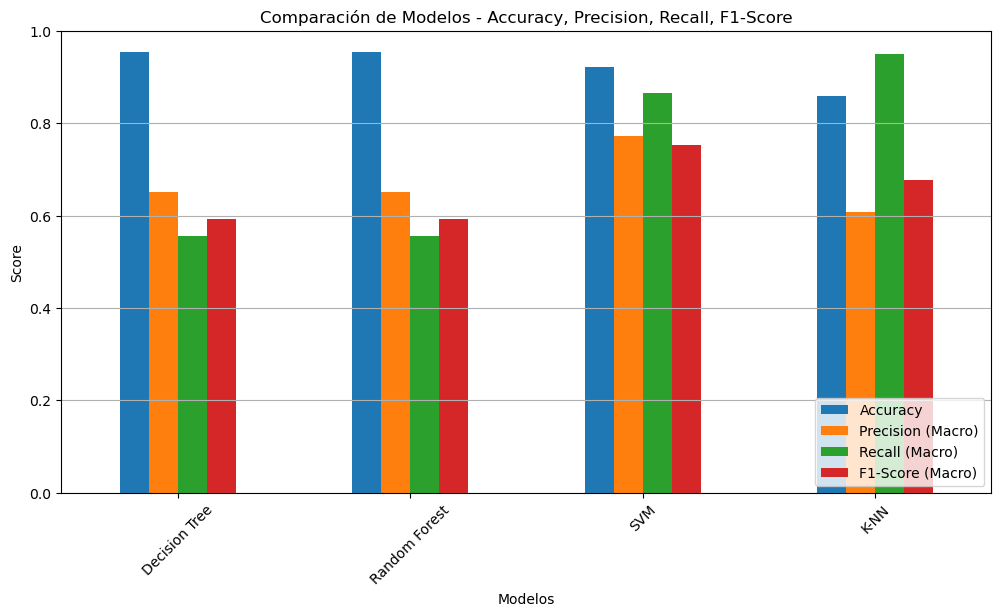

In [149]:
import matplotlib.pyplot as plt

# Graficar resultados
summary.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Modelos - Accuracy, Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.xlabel('Modelos')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

In [155]:
# 1. Ordenar por F1-Score Macro
summary_sorted = summary.sort_values(by='F1-Score (Macro)', ascending=False)

# 2. Mostrar tabla ordenada
print("Resumen Comparativo de Modelos (Ordenado por F1-Score):")
display(summary_sorted)

# 3. Mostrar Mejor Modelo
mejor_modelo = summary_sorted.index[0]
print(f"🏆 El mejor modelo según F1-Score es: {mejor_modelo}")

Resumen Comparativo de Modelos (Ordenado por F1-Score):


,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
SVM,0.921875,0.771825,0.866290,0.752174
K-NN,0.859375,0.607407,0.949153,0.677023
Decision Tree,0.953125,0.650538,0.555556,0.591736
Random Forest,0.953125,0.650538,0.555556,0.591736


🏆 El mejor modelo según F1-Score es: SVM


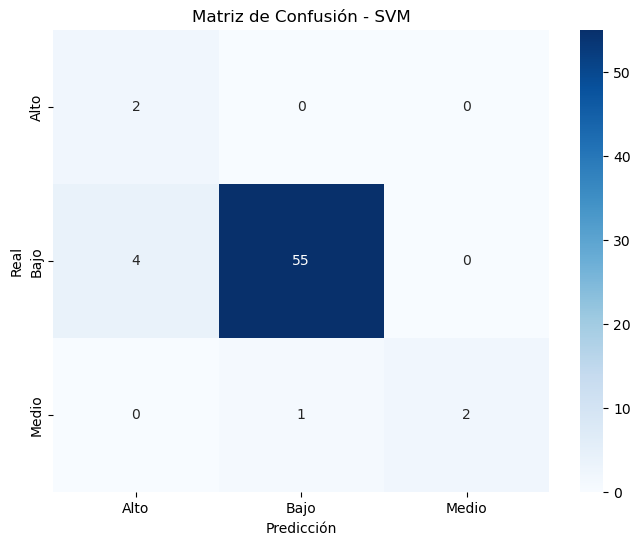

In [157]:
# Reentrenar mejor modelo si hace falta (opcional)
modelo_seleccionado = modelos[mejor_modelo]

if mejor_modelo in ['SVM', 'K-NN']:
    modelo_seleccionado.fit(X_train_bal_scaled, y_train_bal)
    y_pred_mejor = modelo_seleccionado.predict(X_test_scaled)
else:
    modelo_seleccionado.fit(X_train_bal, y_train_bal)
    y_pred_mejor = modelo_seleccionado.predict(X_test)

# 4. Generar matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred_mejor)

# 5. Graficar
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title(f'Matriz de Confusión - {mejor_modelo}')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [1]:
# 1. Reentrenar el modelo Random Forest (si es necesario)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)


NameError: name 'RandomForestClassifier' is not defined